# K-Nearest Neighbors

A k-nearest neighbors (knn) model can be used for classifcation and dregression but we will use it for the classification task. In [knn classification](https://scikitlearn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), an object is classified by the plurality vote of its neighbors, i.e., the the object is assigned to the class most common among its k nearest neighbors. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

#To suppress warnings 
import warnings
warnings.filterwarnings('ignore')

df_AIMD = pd.read_csv("Dist_AIMD.csv") 
df_MD = pd.read_csv('Dist_MD.csv')
df_fin = pd.concat([df_AIMD, df_MD])

df_shuffle = shuffle(df_fin, random_state=0)

df_shuffle.head()

,Class,ClassName,S-O1,S-O2,S-H1,S-H2,C-O1,C-O2,C-H1,C-H2,N-O1,N-O2,N-H1,N-H2
200,0,MD,3.058644,3.268839,2.127982,2.398241,2.880752,3.231719,2.107106,2.465597,2.722132,2.823587,1.790810,1.919631
170,1,AIMD,3.249995,3.263349,2.265893,2.361130,3.094923,3.190536,2.335263,2.485889,2.854410,2.938808,1.871487,2.033413
15,0,MD,2.914829,2.965123,2.012212,2.158510,2.984337,3.054808,2.247004,2.361860,2.715118,2.766487,1.803254,1.861320
181,0,MD,2.874340,3.234227,1.969793,2.422937,3.453376,3.579303,2.573053,2.658360,2.732942,2.971228,1.791051,2.060111
99,0,MD,2.998400,3.009045,2.113534,2.155761,3.038301,3.043577,2.177829,2.206199,2.713162,2.785390,1.798333,1.852806


# Train-test split

In order to use the above DataFrame for learning and testing, we need to split it into training dataset and testing dataset. This can be accomplished using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) function provided by scikit-learn. 

In [2]:
from sklearn.model_selection import train_test_split

# Data selection 
# First we shall select the closest oxygens and later add the rest to see the effects of increasing features
# Then we will repeat it for hydrogens
X3 = df_shuffle[['S-O1', 'C-O1', 'N-O1']]
X6 = df_shuffle[['S-O1', 'C-O1', 'N-O1', 'S-O2', 'C-O2', 'N-O2']]
y = df_shuffle['Class']

# Splitting the data into training(80%) and test(20%) set

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.20, random_state=0)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.20, random_state=0)

print("Size of X3: ", X3.shape)
print("Size of X3_train: ", X3_train.shape)
print("Size of X3_test: ", X3_test.shape)
print("Size of y3_train: ", y3_train.shape)
print("Size of y3_test: ", y3_test.shape)

Size of X3:  (417, 3)
Size of X3_train:  (333, 3)
Size of X3_test:  (84, 3)
Size of y3_train:  (333,)
Size of y3_test:  (84,)


# K nearest neighbor classification

We perform the intial classification with n_neighbors = 5, which is the default value. We also print the distance metric used in this model. 

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 3 feature model
knn.fit(X3_train, y3_train)

print("Metrics used in the model: ", knn.effective_metric_)
print("Accuracy score for knn(5) with 3 features: ", knn.score(X3_test, y3_test))

# 6 feature model
knn.fit(X6_train, y6_train)
print("\nMetrics used in the model: ", knn.effective_metric_)
print("Accuracy score for knn(5) with 6 features: ", knn.score(X6_test, y6_test))

Metrics used in the model:  euclidean
Accuracy score for knn(5) with 3 features:  0.8333333333333334

Metrics used in the model:  euclidean
Accuracy score for knn(5) with 6 features:  0.8928571428571429


### The distance metric used here is 'euclidean', 

There are several other distance metrics but we will not discuss them here. 

## Cross validation

Check [this](https://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation) for more information on what cross-validation is and how we can implement it. 

In [4]:
# Cross validation: Usually a better choice to avoid data leakage

from sklearn.model_selection import cross_val_score

# 5 fold cross valildation for the classifier with 3 and 6 features respectively
cv3_scores = cross_val_score(knn, X3, y, cv=5)
print(cv3_scores, np.mean(cv3_scores))

cv6_scores = cross_val_score(knn, X6, y, cv=5)
print(cv6_scores, np.mean(cv6_scores))

[0.83333333 0.88095238 0.84337349 0.86746988 0.77108434] 0.8392426850258176
[0.88095238 0.9047619  0.92771084 0.97590361 0.87951807] 0.9137693631669535


"cv=5" means 5-fold cross validation scheme where the dataset is divided into 5 sets and one set is used for validation, and the rest is used for training. This process is repeated 5 times and each time we change the validation set, and the scores are saved. 

There are several variations on the cross-validation algorithm. 

## Validation curve

The most important parameter in the K nearest neighbor classification is the value of n_neighbors. We can see the effects of varying this parameter systematically by plotting a [validation curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve)

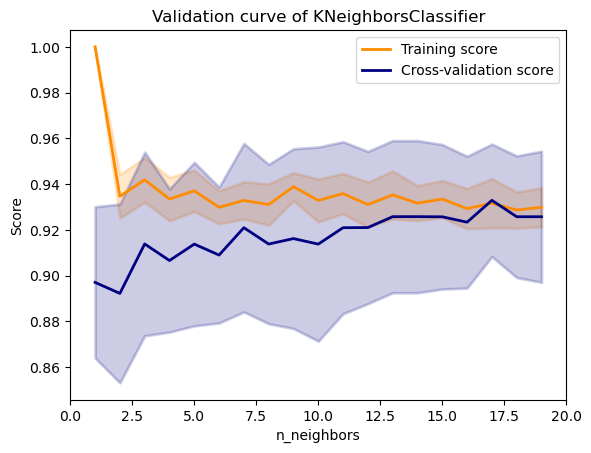

In [5]:
from sklearn.model_selection import validation_curve
from my_utils import plot_validation_curve

param_range = np.arange(1,20,1) # Parameter range for n_neighbors

# Using the dataset with 6 features
train_score, test_score = validation_curve(KNeighborsClassifier(), X6, y, 
                                          param_name = 'n_neighbors', param_range = param_range, cv=5)

plot_validation_curve(train_score, test_score, param_range, 'KNeighborsClassifier', 'n_neighbors')


The validation curve shows the training score (accuracy of the model wrt training data) and the 5-fold cross validation score and their standard deviation with respect to increasing n_neighbor values. 

With n_neighbors=1, the training score is 1 and the cross-validation score is ~0.90 which implies the model is overfitting. 

The ideal value of n_neighbors is around 12 where the training and cross validation curves start to converge. 

## Repeating the above calculation for nearest hydrogens

In [6]:
H3 = df_shuffle[['S-H1', 'C-H1', 'N-H1']]
H6 = df_shuffle[['S-H1', 'C-H1', 'N-H1', 'S-H2', 'C-H2', 'N-H2']]
y = df_shuffle['Class']

X3_train, X3_test, y3_train, y3_test = train_test_split(H3, y, test_size=0.20, random_state=0)
X6_train, X6_test, y6_train, y6_test = train_test_split(H6, y, test_size=0.20, random_state=0)

print("Size of H3: ", X3.shape)
print("Size of X3_train: ", X3_train.shape)
print("Size of X3_test: ", X3_test.shape)
print("Size of y3_train: ", y3_train.shape)
print("Size of y3_test: ", y3_test.shape)

Size of H3:  (417, 3)
Size of X3_train:  (333, 3)
Size of X3_test:  (84, 3)
Size of y3_train:  (333,)
Size of y3_test:  (84,)


In [7]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X3_train, y3_train)
print("Accuracy score for knn(5) with 3 features: ", knn.score(X3_test, y3_test))

knn.fit(X6_train, y6_train)
print("Accuracy score for knn(5) with 6 features: ", knn.score(X6_test, y6_test))

# 5 fold cross valildation for the classifier with 3 and 6 features respectively
cv3_scores = cross_val_score(knn, X3, y, cv=5)
print(cv3_scores, np.mean(cv3_scores))

cv6_scores = cross_val_score(knn, X6, y, cv=5)
print(cv6_scores, np.mean(cv6_scores))

Accuracy score for knn(5) with 3 features:  0.8214285714285714
Accuracy score for knn(5) with 6 features:  0.9047619047619048
[0.83333333 0.88095238 0.84337349 0.86746988 0.77108434] 0.8392426850258176
[0.88095238 0.9047619  0.92771084 0.97590361 0.87951807] 0.9137693631669535


Based on prediction and cross validation accuracy there is little difference bewteen the H and O datasets. We observe that there is small a difference between considering the closest H and closest 2 hydrogens to S, C, and N. 

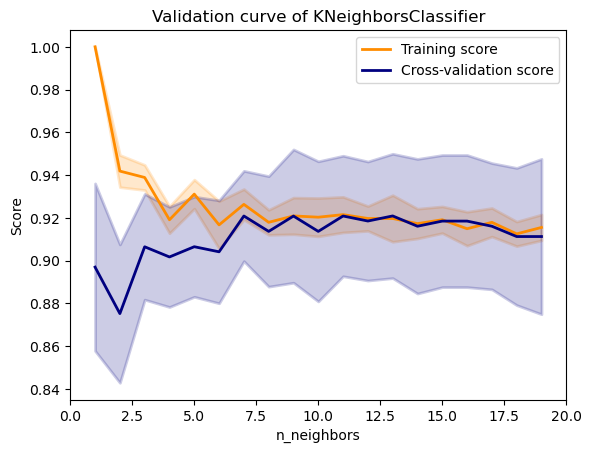

In [8]:
param_range = np.arange(1,20,1) # Parameter range for n_neighbors

# Using the dataset with 6 features
train_score, test_score = validation_curve(KNeighborsClassifier(), H6, y, 
                                          param_name = 'n_neighbors', param_range = param_range, cv=5)

plot_validation_curve(train_score, test_score, param_range, 'KNeighborsClassifier', 'n_neighbors')


The validation curve for O and H case differs considerably. The curve for the hydrogens converges quickly at around 7 neighbors whereas in the O case the convergence is around 12 neighbors. 

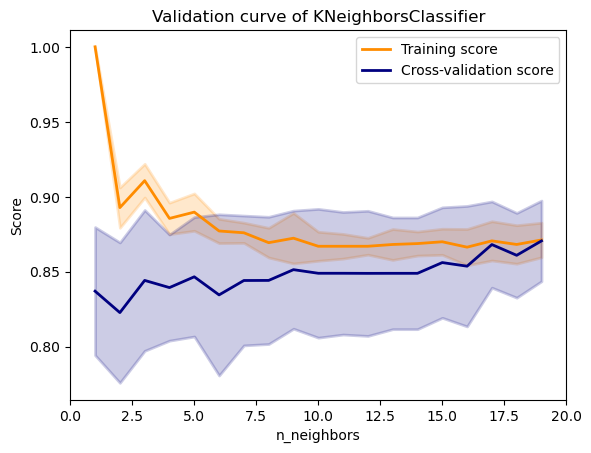

In [9]:
train_score, test_score = validation_curve(KNeighborsClassifier(), H3, y, 
                                          param_name = 'n_neighbors', param_range = param_range, cv=5)

plot_validation_curve(train_score, test_score, param_range, 'KNeighborsClassifier', 'n_neighbors')

The validation curve with only the nearest 1 hydrogen looks similar to the O curve but with worse accuracy scores. 